#**To Explore Business Analytics**

#**Task:**
Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’ You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data? You can choose any of the tool of your choice (Python/ R/Tableau/ PowerBI/ Excel)
 
#**Dataset**
https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view


In [ ]:
#Import the dependency
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#load the dataset
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
#Count the values
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [ ]:
df['City'].value_counts()

New York City        915
Los Angeles          747
Philadelphia         537
San Francisco        510
Seattle              428
                    ... 
Davis                  1
Montebello             1
Elyria                 1
Arlington Heights      1
Vacaville              1
Name: City, Length: 531, dtype: int64

In [ ]:
#Total City and Country
df['Country'].nunique(), df['City'].nunique()

(1, 531)

In [ ]:
#droping the Country bcz all data is from US
df.drop('Country', axis =1, inplace = True)

In [ ]:
#droping the Postal Code bcz same as City
df.drop('Postal Code', axis = 1, inplace = True)
#View the data
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [ ]:
#checking for NULL value
df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Statistics Description of Data 

In [ ]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#Data Correlation
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


## Plotting the data

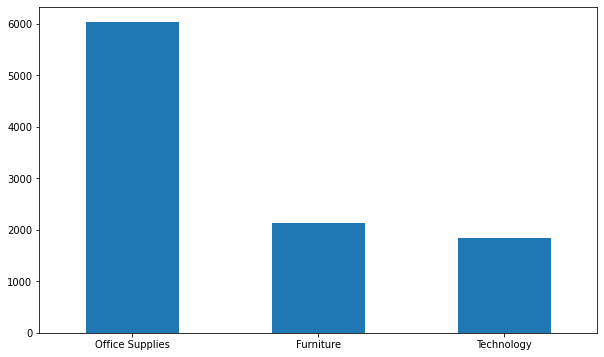

In [ ]:
#targeting the Category vs Sale
#Plotting bar chart
plt.figure(figsize = (10,6))
df['Category'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0);

Clearly the Office Suppiles has highest sale


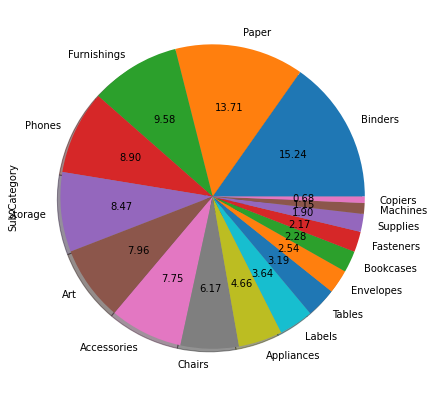

In [ ]:
#Finding the item whose sale is greate in Sub_category
#Plotting pie chart
fig = plt.figure(figsize= (10,7))
df['Sub-Category'].value_counts().plot.pie(autopct = '%.2f',shadow = True);

#**Region VS Category**


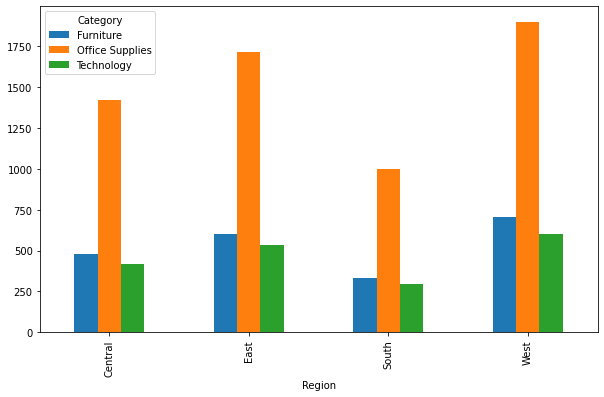

In [ ]:
# Region VS Category in bar chart
pd.crosstab(df['Region'],df['Category']).plot(kind = 'bar',figsize=(10,6))

#From the above graph we conclude -
*  For all regions maximun sell is with "OFFICE SUPPILES"
*  Maximum sale is in **West Region** and minimum in **South Region** of United States

#**Now we want to find Maximum profit and loss**


In [67]:
#Adding Profit and Profit Percentage coulumn
df['%_profit'] = df['Profit'] / df['Sales'] * 100
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,%_profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


In [68]:
#Maximum profit 
print("MAXIMUM PROFIT")
max(df['%_profit'])

MAXIMUM PROFIT


50.0

In [69]:
#Maximum loss 
print("MAXIMIM LOSS")
min(df['%_profit'])

MAXIMIM LOSS


-275.0

In [70]:
#Checking total data less than zero
loss = df[df['%_profit'] < 0]
loss

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,%_profit
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.000000
14,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580,-180.000000
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160,-150.000000
23,Second Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,71.3720,2,0.30,-1.0196,-1.428571
27,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522,-54.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,Bryan,Texas,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176,-160.000000
9921,Standard Class,Home Office,Akron,Ohio,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936,-80.000000
9931,Standard Class,Consumer,San Bernardino,California,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960,-5.882353
9937,Second Class,Corporate,Los Angeles,California,West,Furniture,Tables,71.0880,2,0.20,-1.7772,-2.500000


In [71]:
#Shape of the loss data
print("Total size of Loss data ")
loss.shape

Total size of Loss data 


(1871, 12)

In [72]:
#View the shape of the entire data
print("Total size of data")
df.shape

Total size of data


(9994, 12)

In [73]:
#Checking percentage of loss data (loss data / total data x 100)
1871/9994 * 100

18.721232739643785

Around 18% of data is in loss


#**City wise profit distribution**


In [74]:
#City wise profit
profit_city = df.groupby("City").sum()['Profit']
profit_city

City
Aberdeen          6.6300
Abilene          -3.7584
Akron          -186.6356
Albuquerque     634.0881
Alexandria      318.6183
                 ...    
Woonsocket       78.6791
Yonkers        2767.7557
York           -102.1692
Yucaipa          13.2080
Yuma           -465.9909
Name: Profit, Length: 531, dtype: float64

In [78]:
#Sorting city wise profit Descending
profit_city.sort_values(ascending = False).head()

City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Name: Profit, dtype: float64

In [79]:
#Sorting city wise profit Descending (Top 10 rows)
profit_city.sort_values(ascending = True).head(10)

City
Philadelphia   -13837.7674
Houston        -10153.5485
San Antonio     -7299.0502
Lancaster       -7239.0684
Chicago         -6654.5688
Burlington      -3622.8772
Dallas          -2846.5257
Phoenix         -2790.8832
Aurora          -2691.7386
Jacksonville    -2323.8350
Name: Profit, dtype: float64

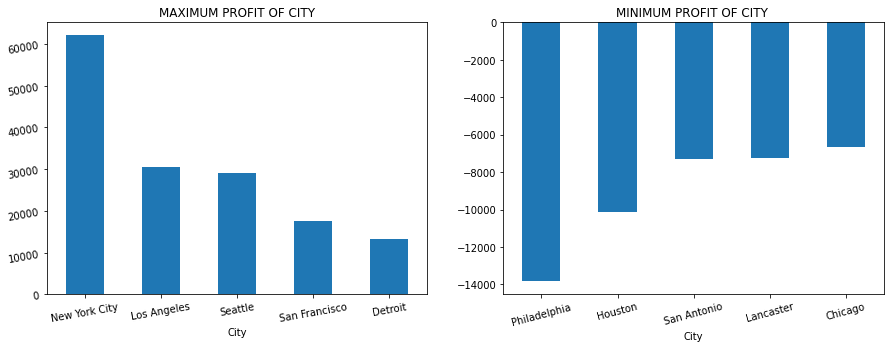

In [80]:
#Plotting Maximum and Minimum profit of city

fig,axes = plt.subplots(1,2, figsize = (15,5))


profit_city.sort_values(ascending = False).head().plot(kind ='bar', ax = axes[0])
axes[0].tick_params(labelrotation = 10)
axes[0].set_title("MAXIMUM PROFIT OF CITY")

profit_city.sort_values(ascending = True).head().plot(kind='bar',ax = axes[1])
plt.xticks(rotation = 15)
plt.title("MINIMUM PROFIT OF CITY ")

plt.show()

###Now its clear that **"New York City"** has Maximum profit and **"Philadelphia"** has Maximum loss

#**State wise profit distribution**


In [82]:
# State wise profit
state_profit = df.groupby('State').sum()['Profit']
state_profit

State
Alabama                  5786.8253
Arizona                 -3427.9246
Arkansas                 4008.6871
California              76381.3871
Colorado                -6527.8579
Connecticut              3511.4918
Delaware                 9977.3748
District of Columbia     1059.5893
Florida                 -3399.3017
Georgia                 16250.0433
Idaho                     826.7231
Illinois               -12607.8870
Indiana                 18382.9363
Iowa                     1183.8119
Kansas                    836.4435
Kentucky                11199.6966
Louisiana                2196.1023
Maine                     454.4862
Maryland                 7031.1788
Massachusetts            6785.5016
Michigan                24463.1876
Minnesota               10823.1874
Mississippi              3172.9762
Missouri                 6436.2105
Montana                  1833.3285
Nebraska                 2037.0942
Nevada                   3316.7659
New Hampshire            1706.5028
New Jersey    

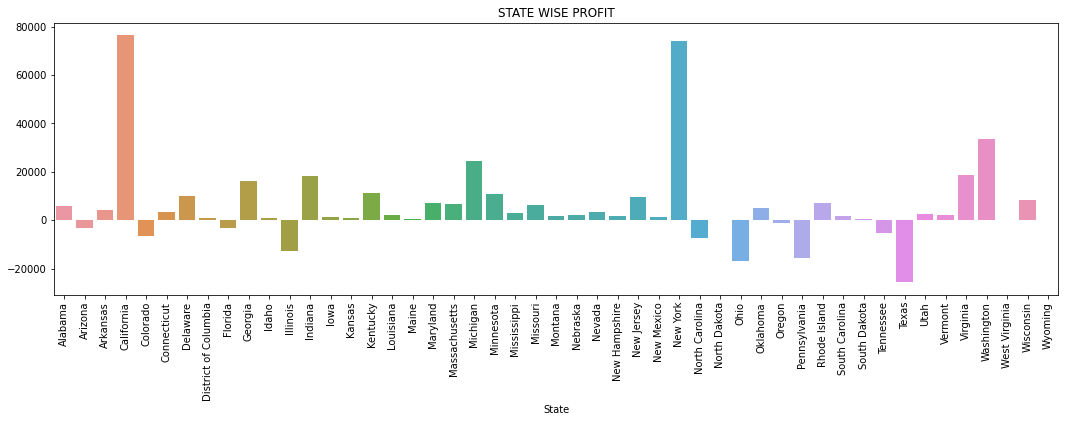

In [83]:
#Plotting state wise profit 

plt.figure(figsize =(18,5))
sns.barplot(x = state_profit.index, y=state_profit.values)
plt.xticks(rotation =90)
plt.title("STATE WISE PROFIT");

In [84]:
#Sorting state wise profit Descending (Top 5 rows)
state_profit.sort_values(ascending = False).head(5)

State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Name: Profit, dtype: float64

In [85]:
#Converting it to dataframe
df_state_profit = pd.DataFrame(state_profit)
type(df_state_profit)

pandas.core.frame.DataFrame

#**Region wise profit distribution**


In [86]:
#Region wise profit
region_profit = pd.DataFrame(df.groupby('Region').sum()['Profit'])
region_profit

,Profit
Region,
Central,39706.3625
East,91522.7800
South,46749.4303
West,108418.4489


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


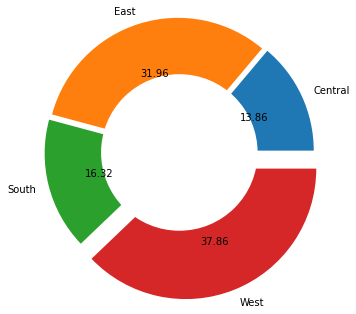

In [87]:
#Plotting Region wise profit (Pie Chart)
plt.pie(region_profit, labels = region_profit.index, autopct= "%.2f", explode = (0.05,0.05,0.05,0.20),radius=1.5)

centre_circle = plt.Circle((0,0), 0.90, fc = 'white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle);

###its clear from the above Pie-chart that **"West Region"** has Maximum profit followed by **"East Region"** 

#**City wise sale distribution**


In [92]:
#City wise sale
city_sale = pd.DataFrame(df.groupby('City').sum()['Sales'])

In [91]:
#Sorting city wise sale Descending (Top 10 rows)
city_sale_sort = city_sale.sort_values(by='Sales',ascending = False).head(10)
city_sale_sort

,Sales
City,
New York City,256368.1610
Los Angeles,175851.3410
Seattle,119540.7420
San Francisco,112669.0920
Philadelphia,109077.0130
Houston,64504.7604
Chicago,48539.5410
San Diego,47521.0290
Jacksonville,44713.1830


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


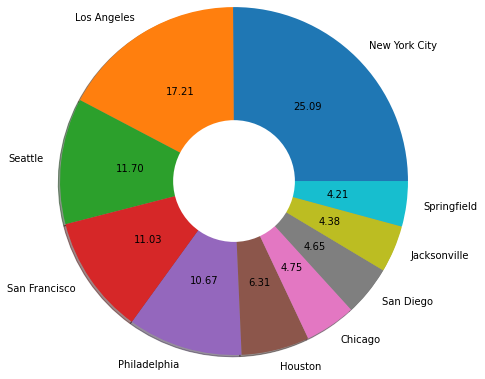

In [93]:
#Plotting city wise sale (Pie Chart)
plt.pie(city_sale_sort, labels = city_sale_sort.index, autopct= "%.2f",shadow = True, radius = 2)

centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle);

###its clear from the above Pie-chart that **"New York City"** has Maximum sale followed by **"Los Angeles"** 

#**State wise sale distribution**


In [94]:
#State wise sale
state_sale = pd.DataFrame(df.groupby('State').sum()['Sales'])

In [95]:
#Sorting state wise sale Descending (Top 10 rows)
state_sale_sort =state_sale.sort_values(by= 'Sales',ascending = False).head(10)
state_sale_sort

,Sales
State,
California,457687.6315
New York,310876.2710
Texas,170188.0458
Washington,138641.2700
Pennsylvania,116511.9140
Florida,89473.7080
Illinois,80166.1010
Ohio,78258.1360
Michigan,76269.6140


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


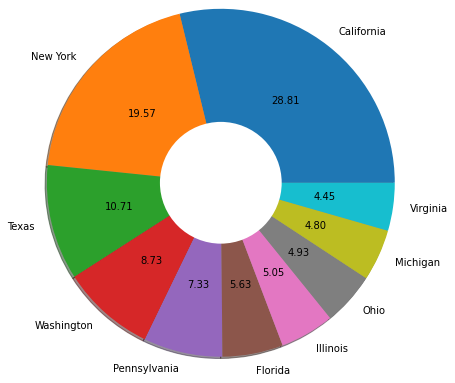

In [96]:
#Plotting state wise sale (Pie Chart)
plt.pie(state_sale_sort, labels = state_sale_sort.index, autopct= "%.2f",shadow = True, radius = 2)

centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle);

###its clear from the above Pie-chart that **"California"** has Maximum sale followed by **"New York"** 

#**Region wise sale distribution**


In [97]:
#Region wise sale
region_sale = pd.DataFrame(df.groupby('Region').sum()['Sales'])

In [98]:
#Sorting Region wise sale Descending (Top 10 rows)
region_sale_sort =region_sale.sort_values(by= 'Sales',ascending = False).head(10)
region_sale_sort

,Sales
Region,
West,725457.8245
East,678781.2400
Central,501239.8908
South,391721.9050


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


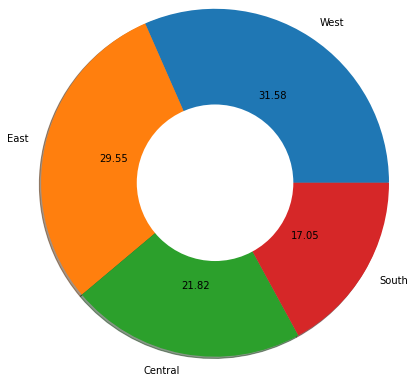

In [99]:
#Plotting region wise sale (Pie Chart)
plt.pie(region_sale_sort, labels = region_sale_sort.index, autopct= "%.2f",shadow = True, radius = 2)

centre_circle = plt.Circle((0,0), 0.90, fc = 'white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle);

###its clear from the above Pie-chart that **"West Region"** has Maximum sale followed by **"East Region"** 